# Customer Churn Prediction
This section demonstrates how to predict customer churn using Pandas for data cleaning and Scikit-Learn for modeling.
We will:
- Simulate a dataset
- Clean and encode data
- Train Logistic Regression and Random Forest models
- Evaluate using classification report, confusion matrix, and ROC curve


In [6]:

import pandas as pd
import numpy as np

# Simulate a churn dataset
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], n),
    'SeniorCitizen': np.random.choice([0, 1], n),
    'Partner': np.random.choice(['Yes', 'No'], n),
    'Dependents': np.random.choice(['Yes', 'No'], n),
    'tenure': np.random.randint(0, 72, n),
    'PhoneService': np.random.choice(['Yes', 'No'], n),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n),
    'MonthlyCharges': np.random.uniform(20, 120, n),
    'TotalCharges': np.random.uniform(20, 8000, n),
    'Churn': np.random.choice(['Yes', 'No'], n)
})

print(data.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              1     Yes         No       6           No   
1  Female              0      No         No      34           No   
2    Male              0      No         No      54          Yes   
3    Male              0      No         No      13           No   
4    Male              0      No        Yes       9           No   

  InternetService  MonthlyCharges  TotalCharges Churn  
0             DSL       97.951670   3501.243290   Yes  
1              No       21.620040   5273.293367   Yes  
2              No      101.838042   3512.980263   Yes  
3              No       24.013886   2228.497973    No  
4              No      108.991338   4474.206047   Yes  


In [7]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
for col in ['gender','Partner','Dependents','PhoneService','InternetService','Churn']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print classification reports
print('Logistic Regression Report:\n', classification_report(y_test, y_pred_log))
print('Random Forest Report:\n', classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52       153
           1       0.49      0.48      0.48       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Random Forest Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       153
           1       0.51      0.50      0.51       147

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



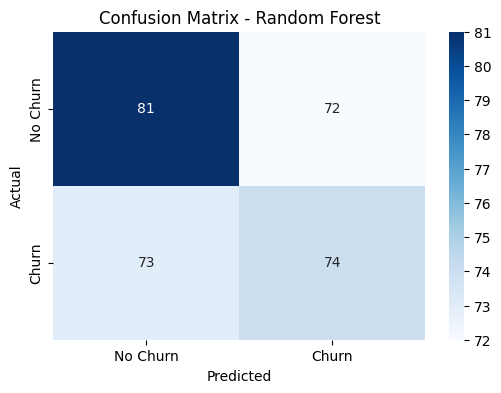

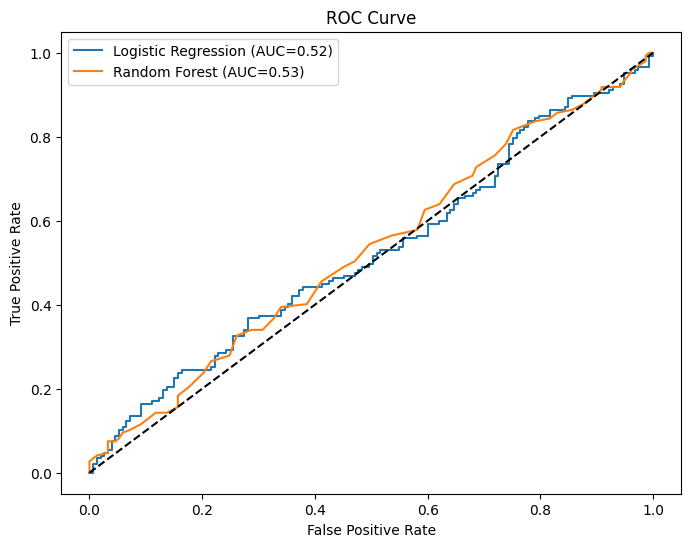

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ✅ Ensure predictions exist
# y_pred_rf = rf.predict(X_test)

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={auc(fpr_log, tpr_log):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()






# A/B Testing for Marketing Campaign
We will:
- Simulate control and variant groups
- Perform t-test and chi-square test
- Visualize conversion rates


T-test p-value: 0.5539701336634208
Chi-square p-value: 0.6214765104174453


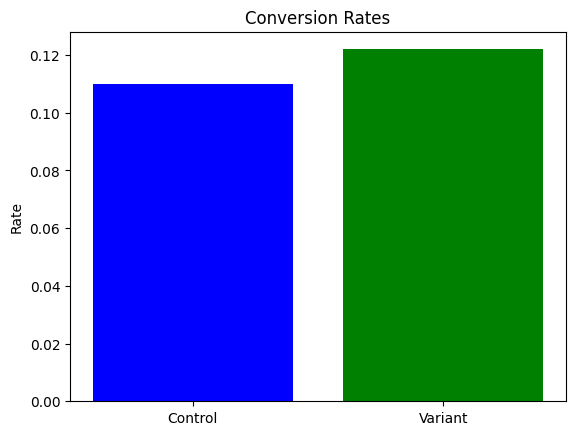

In [11]:

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

# Simulate conversion data
np.random.seed(42)
control = np.random.binomial(1, 0.10, 500)  # 10% conversion
variant = np.random.binomial(1, 0.13, 500)  # 13% conversion

# t-test
stat, pval = ttest_ind(control, variant)
print(f'T-test p-value: {pval}')

# Chi-square test
contingency_table = pd.DataFrame({
    'Converted': [control.sum(), variant.sum()],
    'Not Converted': [len(control)-control.sum(), len(variant)-variant.sum()]
}, index=['Control','Variant'])
chi2, chi_p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square p-value: {chi_p}')

# Visualization
conv_rates = [control.mean(), variant.mean()]
plt.bar(['Control','Variant'], conv_rates, color=['blue','green'])
plt.title('Conversion Rates')
plt.ylabel('Rate')
plt.show()
